# Tutorial 1  for JetSeT v1.2.0

In [28]:
import jetset

In [29]:
print(jetset.__version__)

1.2.0rc6


In [30]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

import numpy as np

## Basic setup and access to Jet class

See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/jet_model_phys_SSC/Jet_example_phys_SSC.html


In [31]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution='lppl')

In [32]:
Jet.available_electron_distributions()


lp: log-parabola
pl: powerlaw
lppl: log-parabola with low-energy powerlaw branch
lpep: log-parabola defined by peak energy
plc: powerlaw with cut-off
bkn: broken powerlaw
superexp: powerlaw with super-exp cut-off


In [33]:
my_jet.show_pars()


In [34]:
my_jet.parameters.par_table


<Table length=11>
 model name        name             par type      ...  log  frozen
   str12          str16              str19        ...  bool  bool 
------------ ---------------- ------------------- ... ----- ------
jet_leptonic                R         region_size ... False  False
jet_leptonic              R_H     region_position ... False   True
jet_leptonic                B      magnetic_field ... False  False
jet_leptonic         beam_obj             beaming ... False  False
jet_leptonic           z_cosm            redshift ... False  False
jet_leptonic             gmin  low-energy-cut-off ... False  False
jet_leptonic             gmax high-energy-cut-off ... False  False
jet_leptonic                N    emitters_density ... False  False
jet_leptonic gamma0_log_parab    turn-over-energy ... False  False
jet_leptonic                s   LE_spectral_slope ... False  False
jet_leptonic                r  spectral_curvature ... False  False

In [35]:
my_jet.show_model()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


In [36]:
my_jet.set_par('B',val=0.2)
my_jet.set_par('gamma0_log_parab',val=5E3)
my_jet.set_par('gmin',val=1E2)
my_jet.set_par('gmax',val=1E8)
my_jet.set_par('R',val=1E15)
my_jet.set_par('N',val=1E3)

In [37]:
my_jet.parameters.B.val=0.2
my_jet.parameters.r.val=0.4

In [38]:
my_jet.show_electron_distribution()


--------------------------------------------------------------------------------
electrons distribution:
 type: lppl  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False



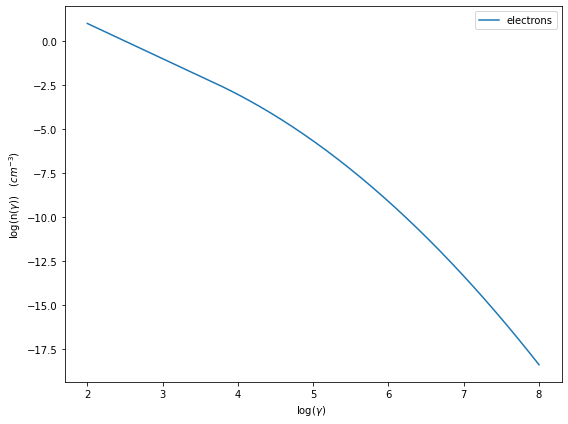

In [39]:
p=my_jet.electron_distribution.plot()

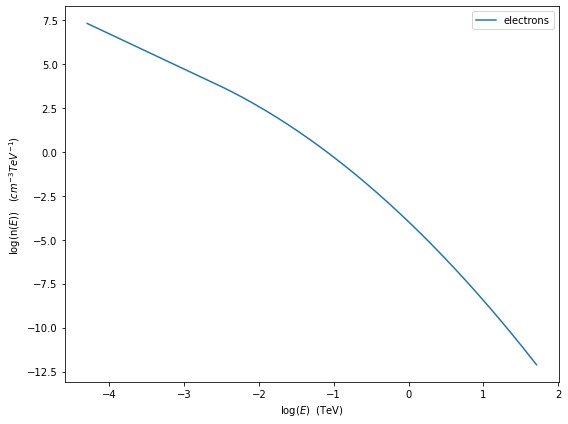

In [40]:
p=my_jet.electron_distribution.plot(energy_unit='TeV')

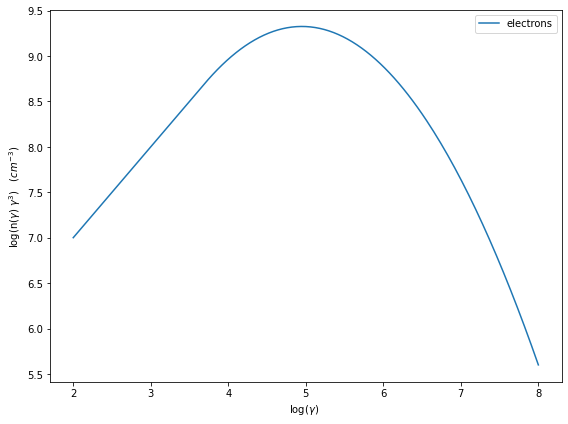

In [41]:
p=my_jet.electron_distribution.plot3p()


In [42]:
my_jet.eval()

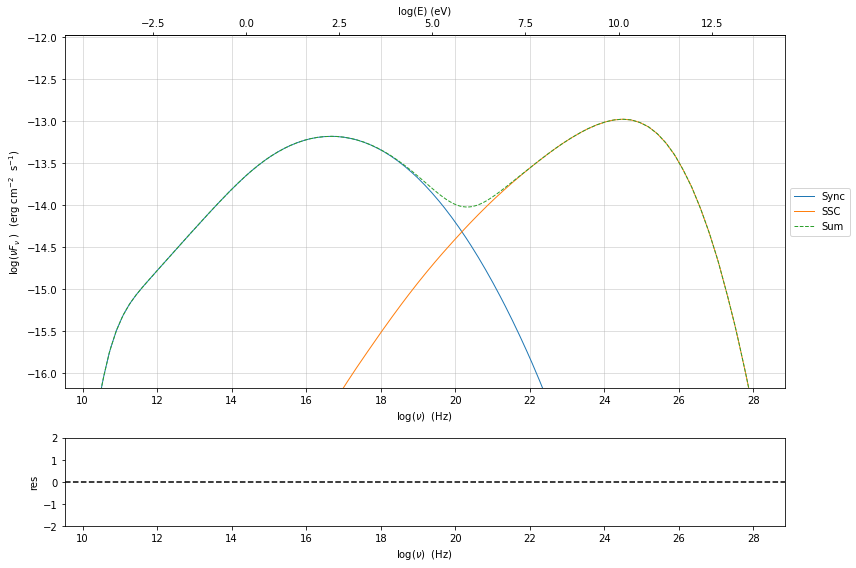

In [43]:
from jetset.plot_sedfit import PlotSED
my_plot=PlotSED()
my_plot=my_jet.plot_model(plot_obj=my_plot)
#my_plot.rescale(y_max=-12,y_min=-17.5,x_min=8)

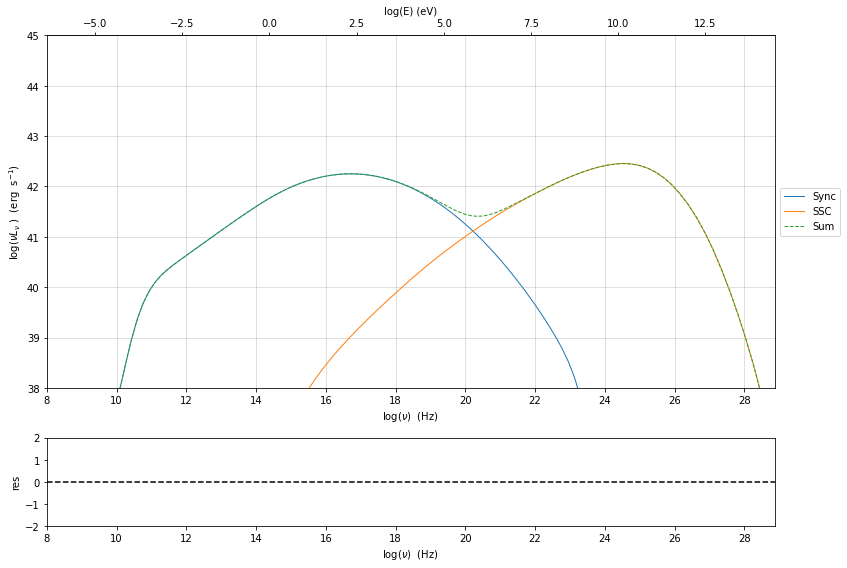

In [44]:
my_plot=my_jet.plot_model(frame='src')
my_plot.rescale(y_max=45,y_min=38,x_min=8)

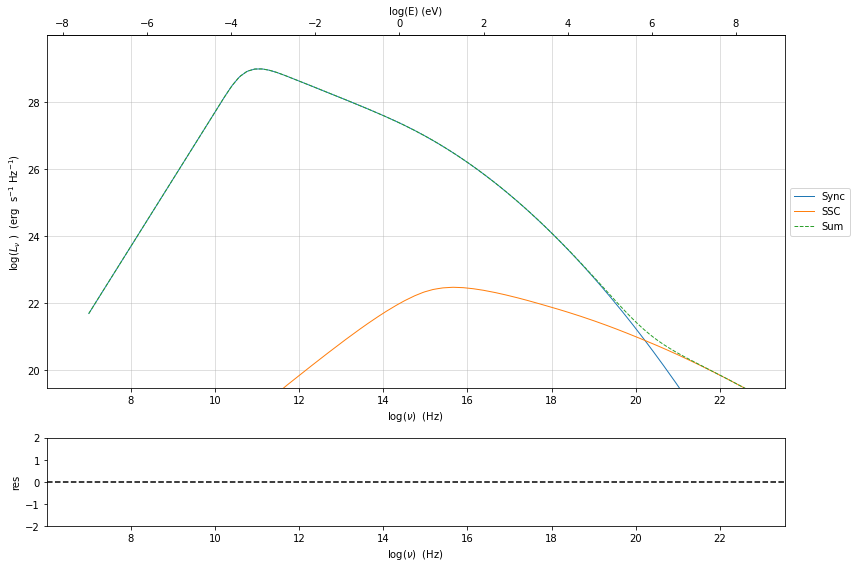

In [45]:
my_jet.eval()
my_plot=my_jet.plot_model(frame='src',density=True)


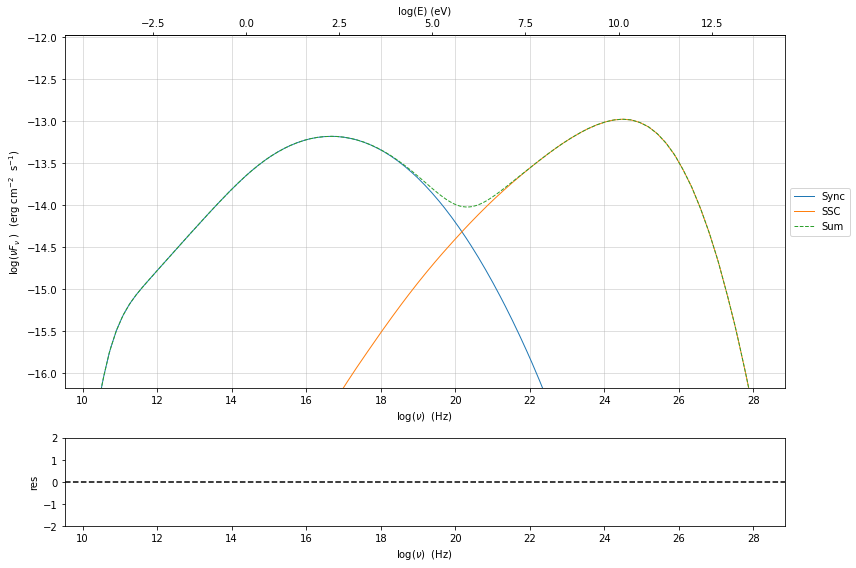

In [46]:
my_jet.eval()
my_jet.plot_model()

In [47]:
my_jet.list_spectral_components()


Sum
Sync
SSC


In [48]:
Sync=my_jet.spectral_components.Sync


In [49]:
Sync=my_jet.get_spectral_component_by_name('Sync')


In [50]:
nu_sync=Sync.SED.nu
nuFnu_sync=Sync.SED.nuFnu

In [51]:
nu_sync_src=Sync.SED.nu_src
nuLnu_sync_src=Sync.SED.nuLnu_src

In [52]:
my_jet.spectral_components.build_table(restframe='obs')
t_obs=my_jet.spectral_components.table

In [53]:
t_obs[::10]


<Table length=50>
          nu                    Sum           ...          SSC          
          Hz               erg / (cm2 s)      ...     erg / (cm2 s)     
       float64                float64         ...        float64        
---------------------- ---------------------- ... ----------------------
             1000000.0                    0.0 ...                    0.0
     3026648.059395689                    0.0 ...                    0.0
      9160598.47544371 1.8603797396558676e-27 ...                    0.0
     27725907.59860481 5.1595363417357764e-26 ...                    0.0
     83916564.42830162  1.431379827478216e-24 ...                    0.0
    253985906.87807292 3.9735563564626905e-23 ...                    0.0
     768725952.1663721 1.1046717952023323e-21 ...                    0.0
     2326662911.331458  3.080805682170684e-20 ...                    0.0
     7041989785.449296  8.644485946297075e-19 ...                    0.0
                   ...                    ... ...                    ...
1.7317171337233599e+25  8.215170127233826e-14 ...  8.215170127233826e-14
5.2412983022060615e+25 5.0064656764602724e-14 ... 5.0064656764602724e-14
1.5863565335085865e+26 2.2032108833042557e-14 ... 2.2032108833042557e-14
 4.801342923653465e+26  6.823069626704561e-15 ...  6.823069626704561e-15
1.4531975242368953e+27 1.4136805292714239e-15 ... 1.4136805292714239e-15
4.3983174666502106e+27 1.9532706759307126e-16 ... 1.9532706759307126e-16
1.3312159025043105e+28 1.7769601809721487e-17 ... 1.7769601809721487e-17
 4.029122027951344e+28  9.162225441406983e-19 ...  9.162225441406983e-19
1.2194734366967333e+29                    0.0 ...                    0.0
 3.690916910662782e+29                    0.0 ...                    0.0

In [54]:
my_jet.spectral_components.build_table(restframe='src')
t_src=my_jet.spectral_components.table

In [55]:
t_obs['Sync'][::10].to('GeV/cm2 s')

<Quantity [0.00000000e+00, 0.00000000e+00, 1.16115770e-24, 3.22032929e-23,
           8.93397018e-22, 2.48009881e-20, 6.89481903e-19, 1.92288766e-17,
           5.39546375e-16, 1.43971905e-14, 1.47242935e-13, 4.30811381e-13,
           7.93047558e-13, 1.37869693e-12, 2.38858295e-12, 4.11308030e-12,
           6.97841919e-12, 1.14712371e-11, 1.77765107e-11, 2.52478913e-11,
           3.26862082e-11, 3.85098848e-11, 4.11054360e-11, 3.98670033e-11,
           3.51138251e-11, 2.79676055e-11, 2.01954050e-11, 1.32229620e-11,
           7.82247636e-12, 4.18742550e-12, 2.03022312e-12, 8.88984658e-13,
           3.51622913e-13, 1.25682603e-13, 3.99830638e-14, 1.00017129e-14,
           1.00606284e-15, 3.47082969e-18, 1.59218601e-25, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00, 0.00000000e+00] GeV / (cm2 s)>

In [56]:
t_src.write('test_SED.txt',format='ascii.ecsv',overwrite=True)


In [57]:
my_jet.energetic_report()


In [58]:
my_jet.energetic_report_table


<Table length=37>
       name                    type               units       val     
      str17                   str29               object    float64   
----------------- ----------------------------- --------- ------------
              U_e Energy dens. blob rest. frame erg / cm3 4.950261e-01
         U_p_cold Energy dens. blob rest. frame erg / cm3 0.000000e+00
              U_B Energy dens. blob rest. frame erg / cm3 1.591549e-03
              U_p Energy dens. blob rest. frame erg / cm3 0.000000e+00
       U_p_target Energy dens. blob rest. frame erg / cm3 0.000000e+00
          U_Synch Energy dens. blob rest. frame erg / cm3 1.316122e-02
      U_Synch_DRF Energy dens. disk rest. frame erg / cm3 1.316122e+02
           U_Disk Energy dens. blob rest. frame erg / cm3 0.000000e+00
            U_BLR Energy dens. blob rest. frame erg / cm3 0.000000e+00
             U_DT Energy dens. blob rest. frame erg / cm3 0.000000e+00
              ...                           ...       ...          ...
     jet_L_EC_CMB                      jet Lum.   erg / s 0.000000e+00
   jet_L_pp_gamma                      jet Lum.   erg / s 0.000000e+00
        jet_L_rad                      jet Lum.   erg / s 9.528254e+40
        jet_L_kin                      jet Lum.   erg / s 4.638913e+42
        jet_L_tot                      jet Lum.   erg / s 4.749110e+42
          jet_L_e                      jet Lum.   erg / s 4.638913e+42
          jet_L_B                      jet Lum.   erg / s 1.491449e+40
     jet_L_p_cold                      jet Lum.   erg / s 0.000000e+00
          jet_L_p                      jet Lum.   erg / s 0.000000e+00
BulkLorentzFactor                                         1.000000e+01

In [59]:
my_jet.save_model('test_model.pkl')


In [60]:
my_jet_new=Jet.load_model('test_model.pkl')


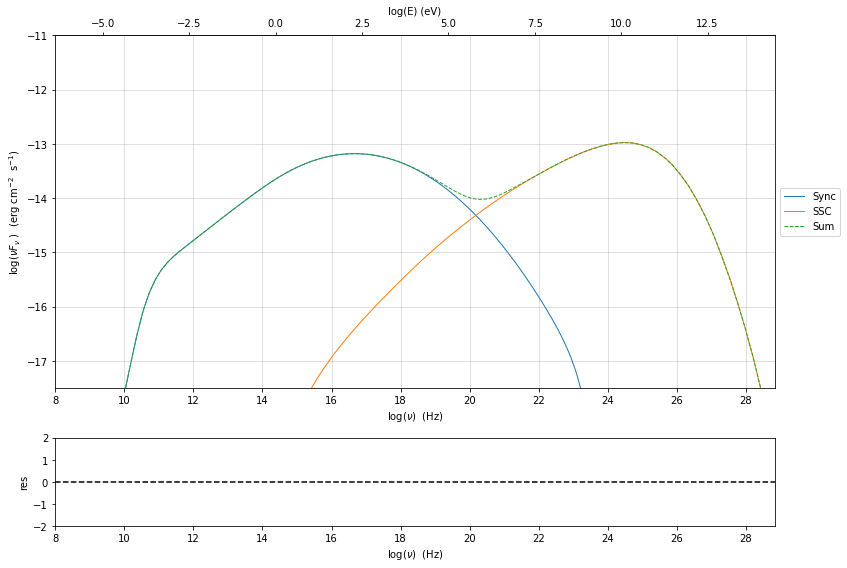

In [61]:
my_plot=my_jet_new.plot_model()
my_plot.rescale(y_max=-11,y_min=-17.5,x_min=8)

## Define custom emiotters distribution

See for more details:

-     https://jetset.readthedocs.io/en/latest/user_guide/custom_emitters_distr/custom_emitters.html

In [62]:
from jetset.jet_emitters import EmittersDistribution


In [63]:
def distr_func_super_exp(gamma,gamma_cut,s,a):
    return np.power(gamma,-s)*np.exp(-(1/a)*(gamma/gamma_cut)**a)

In [64]:
n_e_super_exp=EmittersDistribution('super_exp',spectral_type='plc',normalize=False)
n_e_super_exp.add_par('gamma_cut',par_type='turn-over-energy',val=50000.,vmin=1., vmax=None, unit='lorentz-factor')
n_e_super_exp.add_par('s',par_type='LE_spectral_slope',val=2.3,vmin=-10., vmax=10, unit='')
n_e_super_exp.add_par('a',par_type='spectral_curvature',val=1.8,vmin=0., vmax=100., unit='')

In [65]:
n_e_super_exp.set_distr_func(distr_func_super_exp)


In [66]:
n_e_super_exp.parameters.show_pars()


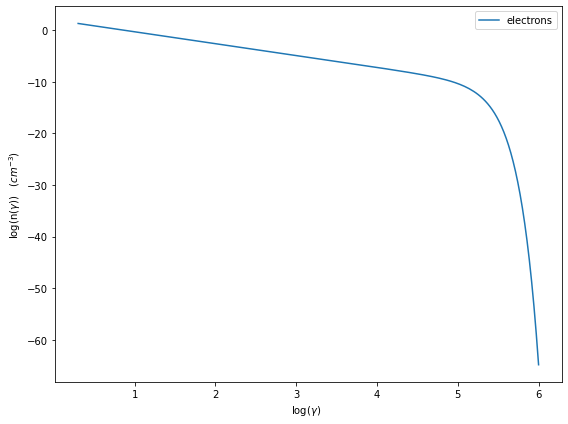

In [67]:
p=n_e_super_exp.plot()


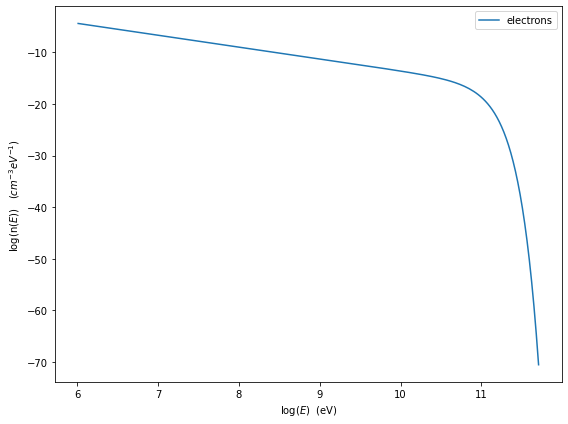

In [68]:
p=n_e_super_exp.plot(energy_unit='eV')


In [69]:
from jetset.jet_model import Jet
my_jet=Jet(electron_distribution=n_e_super_exp)

In [70]:
n_e_super_exp.normalize

False

In [71]:
my_jet.electron_distribution.normalize

False

In [72]:
my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()


--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  False
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


In [73]:
my_jet.eval()


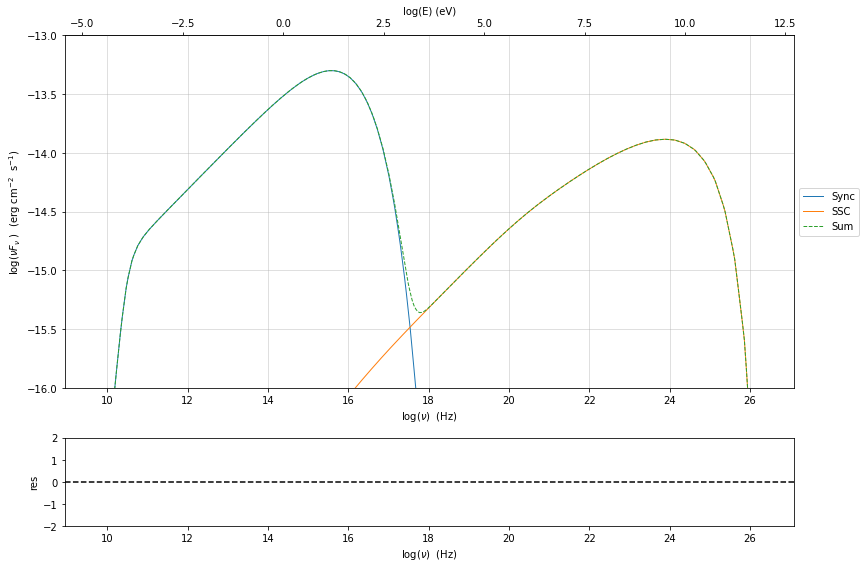

In [74]:
p=my_jet.plot_model()
p.rescale(y_min=-16,y_max=-13)

In [75]:
my_jet.electron_distribution.normalize=True

In [76]:

my_jet.parameters.N.val=5E4
my_jet.show_model()
my_jet.IC_nu_size=100
my_jet.eval()



--------------------------------------------------------------------------------
jet model description
--------------------------------------------------------------------------------
name: jet_leptonic  

electrons distribution:
 type: super_exp  
 gamma energy grid size:  201
 gmin grid : 2.000000e+00
 gmax grid : 1.000000e+06
 normalization  True
 log-values  False

radiative fields:
 seed photons grid size:  100
 IC emission grid size:  100
 source emissivity lower bound :  1.000000e-120
 spectral components:
   name:Sum, state: on
   name:Sync, state: self-abs
   name:SSC, state: on
external fields transformation method: blob

SED info:
 nu grid size jetkernel: 1000
 nu grid size: 500
 nu mix (Hz): 1.000000e+06
 nu max (Hz): 1.000000e+30

flux plot lower bound   :  1.000000e-30

--------------------------------------------------------------------------------


--------------------------------------------------------------------------------


In [77]:
my_jet.plot_model(p,comp='Sum',label='Normalized distr')
p.rescale(y_min=-16,y_max=-12)

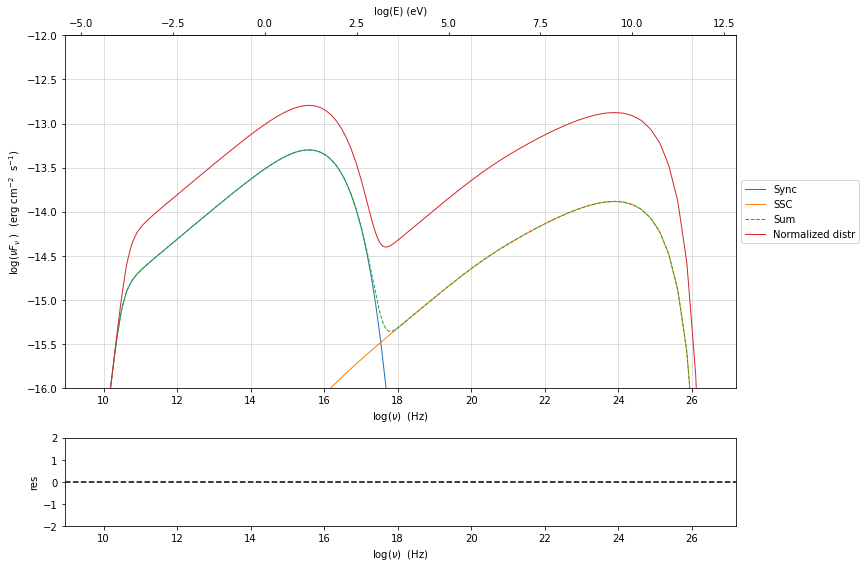

In [78]:
p.fig